In [1]:
import sqlite3
from collections import Counter
import matplotlib.pyplot as plt
import ast

# SELECT host FROM javascript_cookies

In [2]:
con = sqlite3.connect('./datadir/crawl-data.sqlite')
cur = con.cursor()
rows = cur.execute('SELECT host FROM javascript_cookies')
clean_rows = [r[0].strip('.').strip('www.') for r in rows]
con.close()
cnt = Counter(clean_rows)
most_common = cnt.most_common(20)
print(most_common)

[('nytimes.com', 830), ('cnn.com', 445), ('pubmatic.com', 362), ('youtube.com', 226), ('yahoo.com', 196), ('casalemedia.com', 185), ('active.com', 184), ('technoratimedia.com', 144), ('adnxs.com', 134), ('rubiconproject.com', 124), ('adsrvr.org', 120), ('bbc.com', 115), ('cbc.ca', 103), ('go.sonobi.com', 98), ('cbsnews.com', 86), ('nationalacademies.org', 85), ('id5-sync.com', 84), ('aicpa.org', 74), ('lijit.com', 69), ('rlcdn.com', 66)]


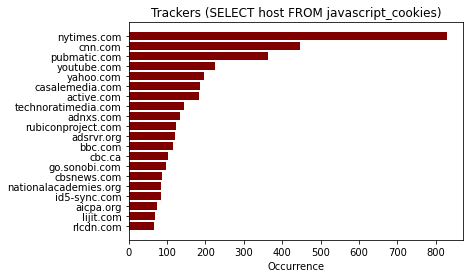

In [3]:
plt.barh(*list(zip(*most_common)), color='maroon')
plt.gca().invert_yaxis() # labels read top-to-bottom
plt.xlabel('Occurrence')
plt.title('Trackers (SELECT host FROM javascript_cookies)')
plt.savefig('tracker_occ_JC.png', bbox_inches="tight", dpi=300)
plt.show()

# SELECT headers FROM http_requests

In [4]:
con = sqlite3.connect('./datadir/crawl-data.sqlite')
cur = con.cursor()
rows = cur.execute('SELECT headers FROM http_requests')
clean_rows = [ast.literal_eval(r[0])[0][1].strip('.').strip('www.') for r in rows]
con.close()
cnt = Counter(clean_rows)
most_common = cnt.most_common(20)
print(most_common)

[('youtube.com', 216), ('nytimes.com', 193), ('app.jastusa.com', 168), ('google.com', 137), ('cm.g.doubleclick.net', 132), ('fonts.gstatic.com', 118), ('isaca.org', 95), ('securepubads.g.doubleclick.net', 95), ('google-analytics.com', 86), ('maps.googleapis.com', 81), ('jastusa.com', 78), ('icap.org.pk', 77), ('dowahdiddy.com', 77), ('static.xx.fbcdn.net', 74), ('pagead2.googlesyndication.com', 74), ('i.guim.co.uk', 74), ('im3d.com', 71), ('s.abcnews.com', 71), ('ciat.cgiar.org', 68), ('static.foxnews.com', 67)]


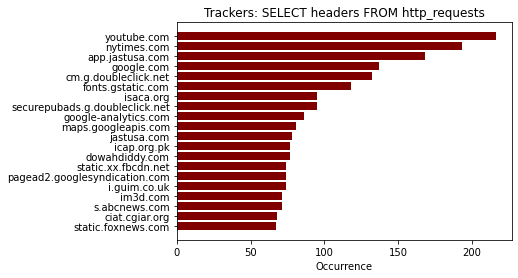

In [5]:
plt.barh(*list(zip(*most_common)), color='maroon')
plt.gca().invert_yaxis() # labels read top-to-bottom
plt.xlabel('Occurrence')
plt.title('Trackers: SELECT headers FROM http_requests')
plt.savefig('tracker_occ_HR.png', bbox_inches="tight", dpi=300)
plt.show()

# SELECT headers FROM http_requests INNER JOIN (SELECT DISTINCT visit_id FROM javascript_cookies) JC ON http_requests.visit_id = JC.visit_id

In [6]:
con = sqlite3.connect('./datadir/crawl-data.sqlite')
cur = con.cursor()
rows = cur.execute('SELECT headers FROM http_requests INNER JOIN (SELECT DISTINCT visit_id FROM javascript_cookies) JC ON http_requests.visit_id = JC.visit_id')
clean_rows = [ast.literal_eval(r[0])[0][1].strip('.').strip('www.') for r in rows]
# print(len(clean_rows))
con.close()
cnt = Counter(clean_rows)
most_common = cnt.most_common(20)
print(most_common)

[('youtube.com', 216), ('nytimes.com', 193), ('app.jastusa.com', 168), ('google.com', 137), ('cm.g.doubleclick.net', 132), ('fonts.gstatic.com', 111), ('isaca.org', 95), ('securepubads.g.doubleclick.net', 95), ('google-analytics.com', 86), ('maps.googleapis.com', 81), ('jastusa.com', 78), ('icap.org.pk', 77), ('pagead2.googlesyndication.com', 74), ('i.guim.co.uk', 74), ('im3d.com', 71), ('s.abcnews.com', 71), ('ciat.cgiar.org', 68), ('static.foxnews.com', 67), ('tpc.googlesyndication.com', 66), ('cbc.ca', 62)]


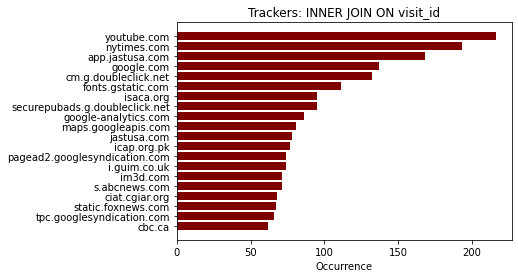

In [7]:
plt.barh(*list(zip(*most_common)), color='maroon')
plt.gca().invert_yaxis() # labels read top-to-bottom
plt.xlabel('Occurrence')
plt.title('Trackers: INNER JOIN ON visit_id')
plt.savefig('tracker_occ_JOIN.png', bbox_inches="tight", dpi=300)
plt.show()